In [1]:
import itertools
import numpy as np

from samples.dataset import Dataset
from samples.sources.maps import MAPS

import tensorflow as tf
from tensorflow import keras

dataset = Dataset()
dataset.add_datasource(MAPS('/datasets/audio/maps'))

print("Dataset loaded.")

Dataset loaded.


In [2]:
window_size = 4096
batch_size = 32

class NoteSequence(keras.utils.Sequence):
    def __init__(self, dataset, window_size, batch_size):
        self.dataset = dataset
        self.window_size = window_size
        self.batch_size = batch_size
        
        self.init_epoch()
        
    def init_epoch(self):
        self.epoch_notes = [note for note in dataset.notes if note.has_samples()]
    
    def on_epoch_end(self):
        self.init_epoch()
        
    def __len__(self):
        return int(np.ceil(len(self.epoch_notes) / self.batch_size))
    
    def __getitem__(self, batch_index):
        batch_notes = self.epoch_notes[(batch_index * self.batch_size) : ((batch_index+1) * self.batch_size)]
        x = [note.random_sample().get_random_clip(self.window_size) for note in batch_notes]
        labels = [note.index for note in batch_notes]
        y = keras.utils.to_categorical(labels, num_classes = (Dataset.MAX_NOTE_INDEX + 1))
        return tf.squeeze(tf.stack(x)), tf.stack(y)
    
note_sequence = NoteSequence(dataset, window_size, batch_size)

In [6]:
model = keras.Sequential()

model.add(keras.layers.Input(shape=([window_size])))

model.add(keras.layers.Lambda(tf.signal.rfft))

model.add(keras.layers.Dense(window_size/2 + 1))
model.add(keras.layers.LeakyReLU(alpha=1e-5))

model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(Dataset.MAX_NOTE_INDEX + 1, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=0.001, clipnorm=1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# history = model.fit(xx, yy, epochs=100, use_multiprocessing=True, workers=8)
# history = model.fit(note_sequence, epochs=100, use_multiprocessing=True, workers=8)
history = model.fit(note_sequence, epochs=1000)
# history = model.train_on_batch(xx, yy)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 2049)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2049)              4200450   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2049)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2049)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 122)               250100    
Total params: 4,450,550
Trainable params: 4,450,550
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 0s 18ms/step - loss: 5.5242 - accuracy: 0.0000e+00
Epoch 2

3/3 [==============================] - 0s 19ms/step - loss: 3.3244 - accuracy: 0.3146
Epoch 73/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.3282 - accuracy: 0.3483
Epoch 74/1000
3/3 [==============================] - 0s 17ms/step - loss: 3.5674 - accuracy: 0.2584
Epoch 75/1000
3/3 [==============================] - 0s 18ms/step - loss: 3.3675 - accuracy: 0.3596
Epoch 76/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.0573 - accuracy: 0.3146
Epoch 77/1000
3/3 [==============================] - 0s 18ms/step - loss: 3.5138 - accuracy: 0.2921
Epoch 78/1000
3/3 [==============================] - 0s 18ms/step - loss: 3.4214 - accuracy: 0.3371
Epoch 79/1000
3/3 [==============================] - 0s 18ms/step - loss: 3.6876 - accuracy: 0.2584
Epoch 80/1000
3/3 [==============================] - 0s 18ms/step - loss: 3.2832 - accuracy: 0.2809
Epoch 81/1000
3/3 [==============================] - 0s 18ms/step - loss: 3.4100 - accuracy: 0.3371
Epoch 82/1000


3/3 [==============================] - 0s 18ms/step - loss: 2.8270 - accuracy: 0.4382
Epoch 154/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.5475 - accuracy: 0.4494
Epoch 155/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.1772 - accuracy: 0.4494
Epoch 156/1000
3/3 [==============================] - 0s 18ms/step - loss: 3.4830 - accuracy: 0.3371
Epoch 157/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.3790 - accuracy: 0.5056
Epoch 158/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.5657 - accuracy: 0.4719
Epoch 159/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.5798 - accuracy: 0.4831
Epoch 160/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.5390 - accuracy: 0.4831
Epoch 161/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.4899 - accuracy: 0.4831
Epoch 162/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.5977 - accuracy: 0.4719
Epoch

3/3 [==============================] - 0s 18ms/step - loss: 2.5047 - accuracy: 0.4607
Epoch 235/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.1941 - accuracy: 0.5056
Epoch 236/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.7063 - accuracy: 0.5056
Epoch 237/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.5679 - accuracy: 0.4944
Epoch 238/1000
3/3 [==============================] - 0s 20ms/step - loss: 2.4522 - accuracy: 0.5056
Epoch 239/1000
3/3 [==============================] - 0s 18ms/step - loss: 3.0879 - accuracy: 0.5393
Epoch 240/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.3179 - accuracy: 0.5169
Epoch 241/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.3028 - accuracy: 0.5393
Epoch 242/1000
3/3 [==============================] - 0s 18ms/step - loss: 3.3219 - accuracy: 0.4944
Epoch 243/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.4782 - accuracy: 0.5955
Epoch

3/3 [==============================] - 0s 17ms/step - loss: 1.9882 - accuracy: 0.6067
Epoch 316/1000
3/3 [==============================] - 0s 16ms/step - loss: 2.2171 - accuracy: 0.5393
Epoch 317/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.6203 - accuracy: 0.5169
Epoch 318/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.3851 - accuracy: 0.5393
Epoch 319/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.6513 - accuracy: 0.6292
Epoch 320/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.3514 - accuracy: 0.5843
Epoch 321/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.7377 - accuracy: 0.5169
Epoch 322/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.3442 - accuracy: 0.5056
Epoch 323/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.7864 - accuracy: 0.6292
Epoch 324/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.5185 - accuracy: 0.5843
Epoch

3/3 [==============================] - 0s 17ms/step - loss: 1.8814 - accuracy: 0.7079
Epoch 397/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.7885 - accuracy: 0.5618
Epoch 398/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.8012 - accuracy: 0.4944
Epoch 399/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.0464 - accuracy: 0.5730
Epoch 400/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.8247 - accuracy: 0.5618
Epoch 401/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.1619 - accuracy: 0.5955
Epoch 402/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.4714 - accuracy: 0.6854
Epoch 403/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.6619 - accuracy: 0.6292
Epoch 404/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.0880 - accuracy: 0.5955
Epoch 405/1000
3/3 [==============================] - ETA: 0s - loss: 1.7392 - accuracy: 0.57 - 0s 17ms/st

3/3 [==============================] - 0s 18ms/step - loss: 1.9730 - accuracy: 0.6629
Epoch 477/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.5974 - accuracy: 0.7079
Epoch 478/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.1082 - accuracy: 0.6067
Epoch 479/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.8021 - accuracy: 0.6404
Epoch 480/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.0820 - accuracy: 0.5730
Epoch 481/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.7970 - accuracy: 0.5955
Epoch 482/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.7204 - accuracy: 0.6966
Epoch 483/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.6130 - accuracy: 0.6629
Epoch 484/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.1423 - accuracy: 0.6404
Epoch 485/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.9492 - accuracy: 0.6854
Epoch

3/3 [==============================] - 0s 18ms/step - loss: 1.4004 - accuracy: 0.7191
Epoch 558/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.8263 - accuracy: 0.5281
Epoch 559/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.2353 - accuracy: 0.6180
Epoch 560/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.6909 - accuracy: 0.6629
Epoch 561/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.4792 - accuracy: 0.6629
Epoch 562/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.6012 - accuracy: 0.6292
Epoch 563/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.5853 - accuracy: 0.6742
Epoch 564/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.6617 - accuracy: 0.6292
Epoch 565/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.7247 - accuracy: 0.6629
Epoch 566/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.8642 - accuracy: 0.5955
Epoch

3/3 [==============================] - 0s 18ms/step - loss: 1.9195 - accuracy: 0.6404
Epoch 639/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.9658 - accuracy: 0.5730
Epoch 640/1000
3/3 [==============================] - 0s 22ms/step - loss: 2.4057 - accuracy: 0.6180
Epoch 641/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.1148 - accuracy: 0.5955
Epoch 642/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.6867 - accuracy: 0.7079
Epoch 643/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.1327 - accuracy: 0.5730
Epoch 644/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.5225 - accuracy: 0.6629
Epoch 645/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.6667 - accuracy: 0.6629
Epoch 646/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.2794 - accuracy: 0.7528
Epoch 647/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.3206 - accuracy: 0.6067
Epoch

3/3 [==============================] - 0s 19ms/step - loss: 1.5417 - accuracy: 0.6517
Epoch 720/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.6507 - accuracy: 0.7079
Epoch 721/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.7981 - accuracy: 0.6404
Epoch 722/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.2622 - accuracy: 0.7191
Epoch 723/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.6253 - accuracy: 0.6742
Epoch 724/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.8043 - accuracy: 0.6517
Epoch 725/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.4115 - accuracy: 0.6629
Epoch 726/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.1744 - accuracy: 0.7640
Epoch 727/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.8337 - accuracy: 0.6854
Epoch 728/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.5940 - accuracy: 0.6292
Epoch

3/3 [==============================] - 0s 18ms/step - loss: 1.6931 - accuracy: 0.7303
Epoch 801/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.6222 - accuracy: 0.6629
Epoch 802/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.1453 - accuracy: 0.7416
Epoch 803/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.5491 - accuracy: 0.7191
Epoch 804/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.6556 - accuracy: 0.6629
Epoch 805/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.0431 - accuracy: 0.5955
Epoch 806/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.0819 - accuracy: 0.5955
Epoch 807/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.6003 - accuracy: 0.6966
Epoch 808/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.5688 - accuracy: 0.6966
Epoch 809/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.4379 - accuracy: 0.7079
Epoch

3/3 [==============================] - 0s 18ms/step - loss: 1.4243 - accuracy: 0.7640
Epoch 882/1000
3/3 [==============================] - 0s 18ms/step - loss: 3.0389 - accuracy: 0.6629
Epoch 883/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.1503 - accuracy: 0.7865
Epoch 884/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.7054 - accuracy: 0.6742
Epoch 885/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.8482 - accuracy: 0.6966
Epoch 886/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.4296 - accuracy: 0.7079
Epoch 887/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.5052 - accuracy: 0.7416
Epoch 888/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.8313 - accuracy: 0.7303
Epoch 889/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.6189 - accuracy: 0.7865
Epoch 890/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.5250 - accuracy: 0.6742
Epoch

3/3 [==============================] - 0s 19ms/step - loss: 1.2356 - accuracy: 0.8090
Epoch 963/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.3810 - accuracy: 0.6966
Epoch 964/1000
3/3 [==============================] - 0s 17ms/step - loss: 2.0582 - accuracy: 0.7191
Epoch 965/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.7166 - accuracy: 0.7640
Epoch 966/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.5704 - accuracy: 0.7079
Epoch 967/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0831 - accuracy: 0.7753
Epoch 968/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.5590 - accuracy: 0.7865
Epoch 969/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.3706 - accuracy: 0.7079
Epoch 970/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.6303 - accuracy: 0.7303
Epoch 971/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.7445 - accuracy: 0.7191
Epoch

In [ ]:
# keras.utils.plot_model(model, show_shapes=True)

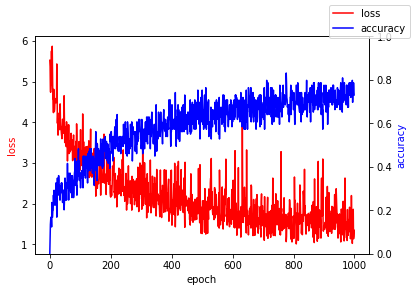

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss', color='red')

ax2 = ax1.twinx()
ax2.set_ylabel('accuracy', color='blue')
ax2.set_ylim(0, 1)

ax1.plot(history.history['loss'], label='loss', color='red')
ax2.plot(history.history['accuracy'], label='accuracy', color='blue')
fig.legend()
plt.show()